In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "C:/HocML/Stage1/opsd_germany_daily.csv"

opsd_daily = pd.read_csv(dataset_path)

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head(3)

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [26]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [27]:
opsd_daily = pd.read_csv(dataset_path, index_col=0, parse_dates=True

)
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
opsd_daily.sample(5,random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [28]:
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [29]:
opsd_daily.loc["2012-02"].head(4)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday


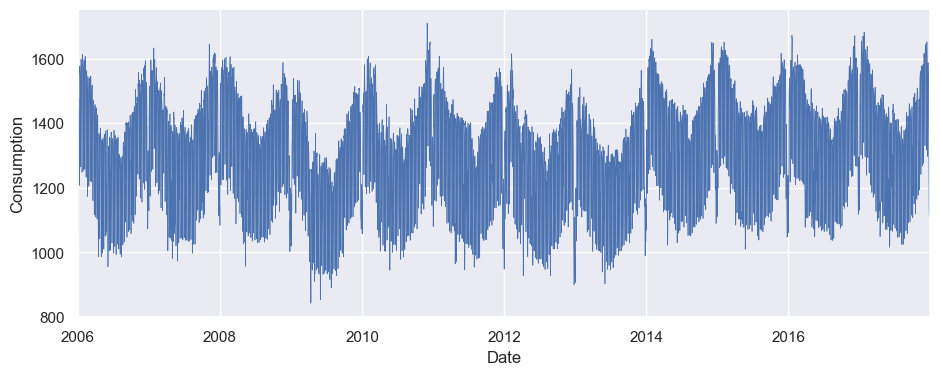

In [30]:
sns.set(rc={"figure.figsize":(11,4)})
col_to_plot = "Consumption"
opsd_daily[col_to_plot].plot(linewidth = 0.5)
plt.ylabel(col_to_plot)
plt.show()

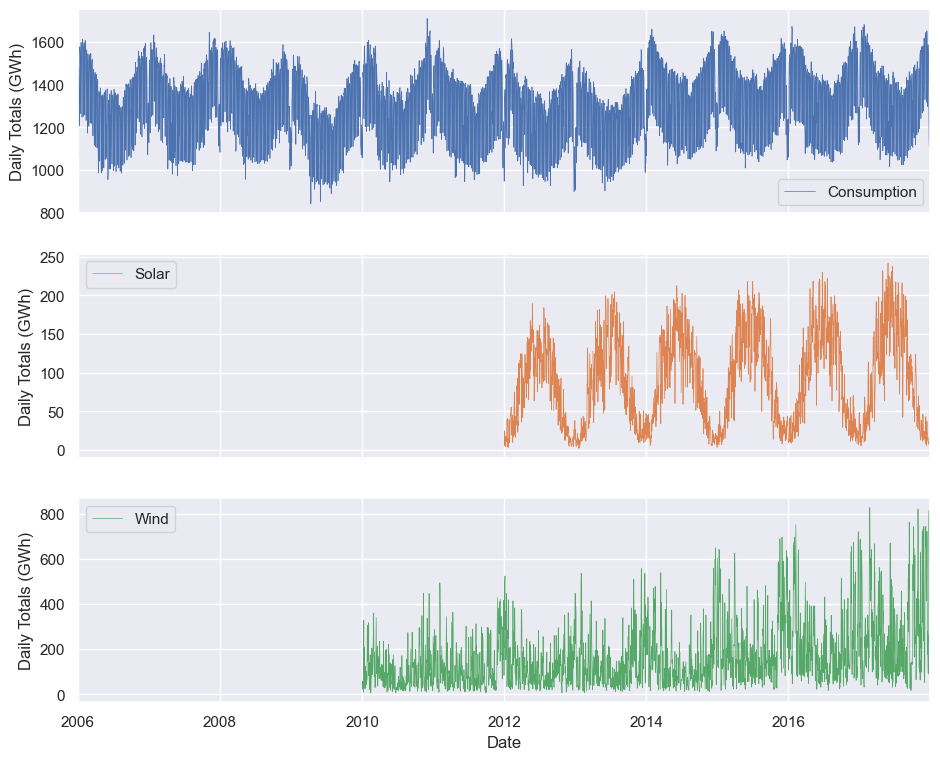

In [31]:
cols_plot = ["Consumption","Solar","Wind"]
axes = opsd_daily[cols_plot].plot(
    subplots=True,
    linewidth = 0.5,
    figsize=(11,9)
)
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")
plt.show()

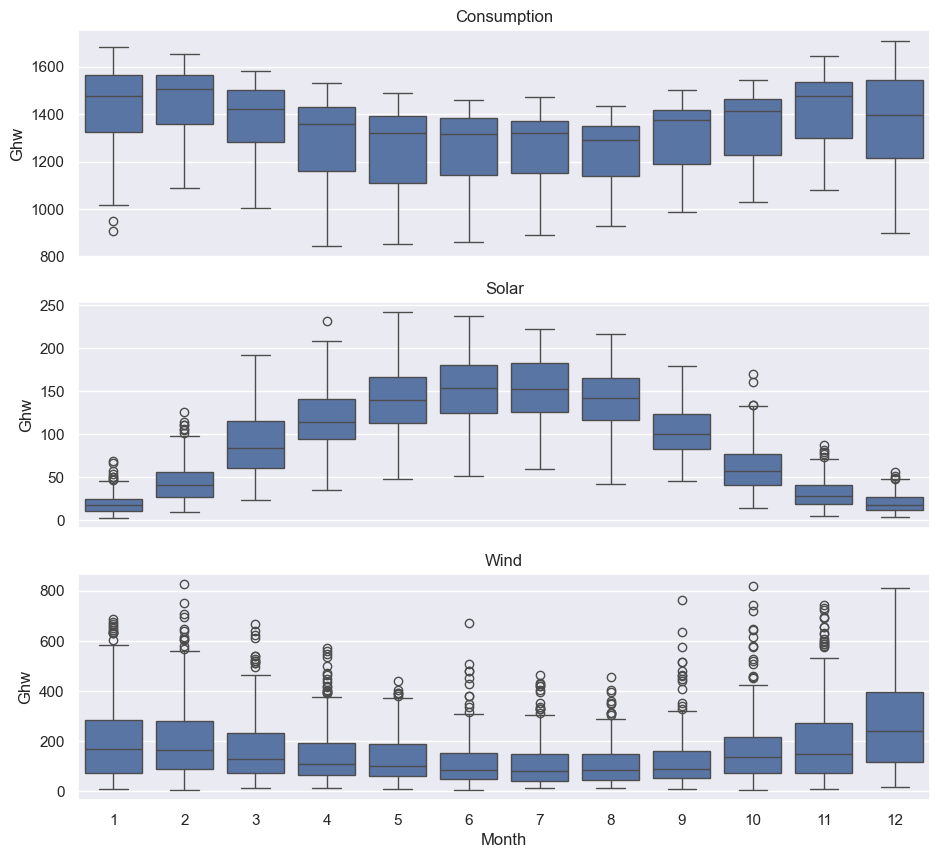

In [32]:
fig, axes = plt.subplots(3,1, figsize = (11,10),sharex = True)
for name, ax in zip(["Consumption","Solar","Wind"],axes):
    sns.boxplot(data = opsd_daily, x = "Month", y = name, ax = ax)
    ax.set_ylabel("Ghw")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel("")
plt.show()

In [33]:
pd.date_range("1998-03-10","1998-03-15",freq = "D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [34]:
time_sample = pd.to_datetime(["2013-02-03","2013-02-06","2013-02-08"])
consum_sample = opsd_daily.loc[time_sample,["Consumption"]].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [35]:
consum_freq = opsd_daily.loc[pd.date_range("2013-02-03","2013-02-08",freq="D")].copy()

consum_freq["Consumption - Forward Fill"] = consum_sample.asfreq("D",method="ffill")

consum_freq

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Consumption - Forward Fill
2013-02-03,1109.639,251.234,19.923,271.157,2013,2,Sunday,1109.639
2013-02-04,1376.753,370.033,12.065,382.098,2013,2,Monday,1109.639
2013-02-05,1400.332,295.974,28.417,324.391,2013,2,Tuesday,1109.639
2013-02-06,1451.449,100.776,31.005,131.781,2013,2,Wednesday,1451.449
2013-02-07,1457.147,53.560,18.073,71.633,2013,2,Thursday,1451.449
2013-02-08,1433.098,31.622,14.591,46.213,2013,2,Friday,1433.098


In [36]:
data_columns = ["Consumption","Wind","Solar","Wind+Solar"]
opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


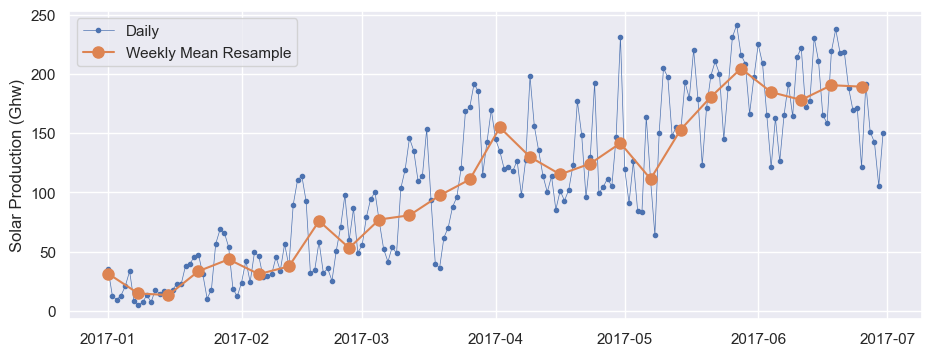

In [37]:
start,end = "2017-01","2017-06"

fig , ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end,"Solar"],
        marker=".",linestyle="-",linewidth=0.5,label="Daily")
ax.plot(opsd_weekly_mean.loc[start:end,"Solar"],
        marker = "o",markersize=8,linestyle="-",label="Weekly Mean Resample")
ax.set_ylabel("Solar Production (Ghw)")
ax.legend()
plt.show()

In [41]:
opsd_annual = opsd_daily[data_columns].resample("YE").sum(min_count=360)

opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"

opsd_annual["Wind+Solar/Consumption"] = (opsd_annual["Wind+Solar"]) / opsd_annual["Consumption"]

opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


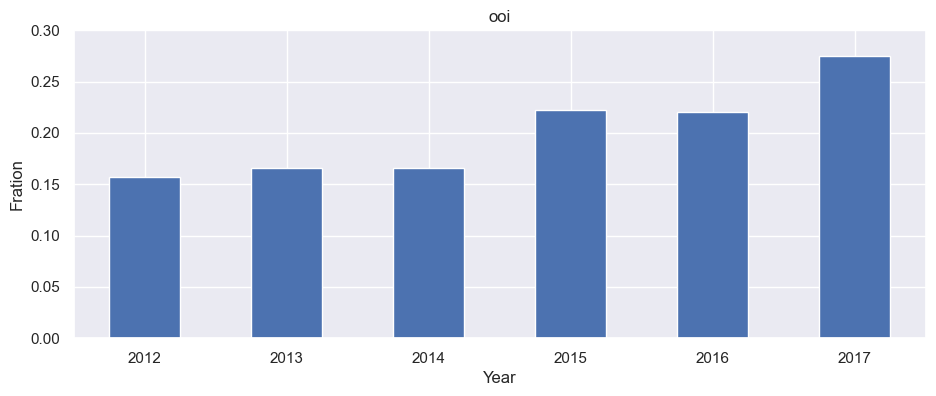

In [43]:
ax = opsd_annual.loc[2012:,"Wind+Solar/Consumption"].plot.bar(color = "C0")
ax.set_ylabel("Fration")
ax.set_ylim(0,0.3)
ax.set_title("ooi")
plt.xticks(rotation = 0)
plt.show()

In [45]:
opsd_7d = opsd_daily[data_columns].rolling(7,center = True,min_periods=1).mean()
opsd_7d.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1337.363750,NaN,NaN,NaN
2006-01-02,1365.317200,NaN,NaN,NaN
2006-01-03,1371.668833,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
